In [12]:
from Helmholtz_recon import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2
from scipy import ndimage


(224, 224, 30)

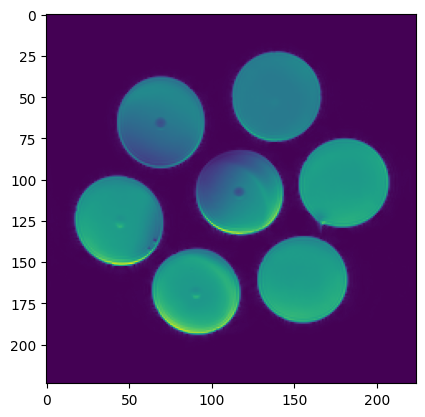

In [14]:
# MRI scan data 
path = 'C:\\Users\\20203226\\Documents\\GitHub\\BEP\\MRI results\\1_TSE_tra_A.mat'
ph_b = scipy.io.loadmat(path)['SE']
plt.imshow(np.absolute(ph_b[:,:,16]))
ph_b.shape

In [15]:
path = 'C:\\Users\\20203226\\Documents\\GitHub\\BEP\\MRI results\\1_B1plus_mag.mat'
b1p = scipy.io.loadmat(path)['B1mag']

factor = ph_b.shape[0] / b1p.shape[0]
print(factor)

#Define the scaling factor for each dimension
scale_factor = (factor, factor,1)

# Perform bilinear interpolation using the zoom function
b1p = ndimage.zoom(b1p, scale_factor, order=1)
b1p_phase = b1p * np.exp(1j*np.angle(ph_b))
b1p_phase.shape

3.5


(224, 224, 30)

C:\Users\20203226\AppData\Local\Temp\ipykernel_11932\3954259897.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


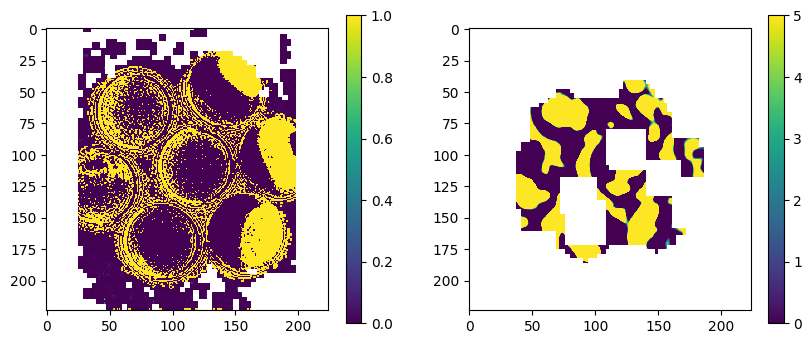

In [23]:
# b1p = b1p[:,:,80]

sig_HH = Helmholtz(b1p_phase, ks=3)
slice = 27

# sig_HH = Helmholtz_ph(np.angle(ph_b[:,:,slice_number]))

sig_b = smooth_HH(sig_HH, 3)

plt.subplots(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sig_HH[:,:,slice], vmin=0, vmax=1)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(sig_b[:,:,slice], vmin=0, vmax=5)
plt.colorbar()

In [120]:
#ensure that the plot opens in its own window
get_ipython().run_line_magic('matplotlib', 'qt')

#set up the overarching window
fig, axes = plt.subplots(1,1)
fig.figsize = [16,16]

#plot the images
axes.imshow(sig_b, vmin=0, vmax=3)
axes.set_title("Phase image smoothed")

#accumulate points
points = plt.ginput(n=-1, timeout=30)
plt.close(fig)

#restore to inline figure placement
get_ipython().run_line_magic('matplotlib', 'inline')
middle_x = (int(points[0][0]) + int(points[1][0]))// 2
middle_y = (int(points[0][1]) + int(points[1][1]))// 2
radius = int(np.sqrt(((points[0][0]- points[1][0])**2) + ((points[0][1]- points[1][1])**2)) / 2)
(middle_x,middle_y, radius)

(68, 61, 15)

0.33725420209387863

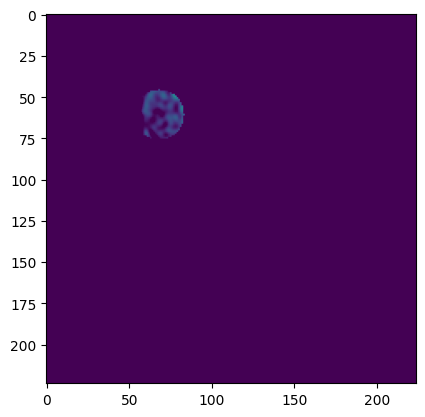

In [123]:
mask = np.zeros(sig_b.shape, dtype="uint8")

cv2.circle(mask, (middle_x, middle_y), radius, 255, -1)

masked = cv2.bitwise_and(sig_b, sig_b, mask=mask)

cv2.imwrite('C:\\Users\\20203226\\Documents\\GitHub\\BEP\\MRI results\\masks\\Round_1_1\\Sample_11\\' + '{}.png'.format(slice_number), mask)


# # show the output images
# cv2.imshow("Circular Mask", mask)
plt.imshow(masked, vmin=0, vmax=3)
# cv2.imshow("Mask Applied to Image", masked)
# cv2.waitKey(0)

mask_bool = mask>0
np.mean(sig_b[mask_bool])

In [19]:
plt.plot(sig_HH[:,112])
ax = plt.gca()
ax.set_ylim([0, 0.5])

IndexError: index 112 is out of bounds for axis 1 with size 112